# 1. Data Analysis

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
vehicle_df = pd.read_csv('vehicles_data.csv', encoding = "ISO-8859-1")
vehicle_df

C:\Users\MaxSh\AppData\Local\Temp\ipykernel_7424\2438051404.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicle_df = pd.read_csv('vehicles_data.csv', encoding = "ISO-8859-1")


,Date Of Stop,Time Of Stop,Description,Location,VehicleType,Year,Make,Model,Color,Violation Type,Race,Gender,Price
0,9/30/14,23:51:00,DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED ...,PARK RD AT HUNGERFORD DR,02 - Automobile,2014.0,FORD,MUSTANG,BLACK,Citation,BLACK,M,7949.0
1,3/31/15,23:59:00,HEADLIGHTS (*),CONNECTICUT AT METROPOLITAN AVE,02 - Automobile,2003.0,HONDA,2S,BLUE,ESERO,HISPANIC,M,3022.0
2,9/30/14,23:30:00,FAILURE TO DISPLAY TWO LIGHTED FRONT LAMPS WHE...,OBSERVATION @ RIDGE ROAD,02 - Automobile,2009.0,TOYOTA,CAMRY,RED,Warning,BLACK,F,4939.0
3,3/31/15,23:59:00,DRIVER FAILURE TO STOP AT STOP SIGN LINE,W/B PLYERS MILL RD AT METROPOLITAN AVE,02 - Automobile,2007.0,ACURA,MDX,BLACK,Warning,WHITE,F,4105.0
4,3/31/15,23:58:00,STOP LIGHTS (*),2355 NB AT BATTERY LN,02 - Automobile,2003.0,NISSAN,MURANO,SILVER,ESERO,OTHER,M,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
803884,9/29/14,14:11:00,TIRES,GREAT SENECA HWY @ GREAT SENECA CREEK,02 - Automobile,1996.0,LEXUS,ES 300 4S,WHITE,ESERO,BLACK,M,500.0
803885,9/29/14,21:23:00,HEADLIGHTS (*),"7505 DEMOCRACY BLV ,MCG",02 - Automobile,2011.0,KIA,VN,RED,ESERO,BLACK,M,7217.0
803886,9/29/14,21:37:00,HEADLIGHTS (*),7300 TUCKERMAN LA AT 10998 WESTLAKE DR,02 - Automobile,2012.0,FIAT,2S,RED,ESERO,WHITE,F,7128.0
803887,9/28/14,23:33:00,HEADLIGHTS (*),DARNESTOWN RD @ QUINCE ORCHARD RD,02 - Automobile,1992.0,JEEP,TK,SILVER,ESERO,WHITE,M,500.0


>> Lets get our unique years, and filter out our 6th newest year

In [26]:
unique_years = sorted(vehicle_df['Year'].unique(), reverse=True)

TypeError: '<' not supported between instances of 'float' and 'str'

>> Well, its not a string so lets filter

In [59]:
vehicle_df['Year'] = pd.to_numeric(vehicle_df['Year'], errors='coerce')
vehicle_df = vehicle_df.dropna(subset=['Year'])
unique_years = sorted(vehicle_df['Year'].unique(), reverse=True)

if len(unique_years) >= 6:
    sixth_newest = unique_years[5]
    print("6th newest year:", sixth_newest)

    # Filter rows for that year
    filtered_df = vehicle_df[vehicle_df['Year'] == sixth_newest]
    print(filtered_df)
else:
    print("There are fewer than 6 unique years.")

6th newest year: 9035
       Date Of Stop Time Of Stop  \
193898       1/6/16     16:04:00   
193899       1/6/16     16:04:00   

                                              Description  \
193898  FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...   
193899  OPER. MOTOR VEH. WITH OPERATOR NOT RESTRAINED ...   

                               Location      VehicleType  Year    Make  Model  \
193898  UNIVERSITY BLVD W / NICHOLAS DR  02 - Automobile  9035  TOYOTA  CAMRY   
193899  UNIVERSITY BLVD W / NICHOLAS DR  02 - Automobile  9035  TOYOTA  CAMRY   

        Color Violation Type   Race Gender      Price  
193898  WHITE        Warning  BLACK      F  2816339.0  
193899  WHITE       Citation  BLACK      F  2816339.0  


>> Well that looks like garbage

In [60]:
# Convert Year to numeric (handles text or NaN safely)
vehicle_df['Year'] = pd.to_numeric(vehicle_df['Year'], errors='coerce')

# Drop rows without a valid year
vehicle_df = vehicle_df.dropna(subset=['Year'])

# Convert to int for neatness
vehicle_df['Year'] = vehicle_df['Year'].astype(int)

# Find unique years, sorted newest → oldest
unique_years = sorted(vehicle_df['Year'].unique(), reverse=True)
# Lets Check!!
sixth_newest = unique_years[5]
filtered_df = vehicle_df[vehicle_df['Year'] == sixth_newest]
filtered_df

,Date Of Stop,Time Of Stop,Description,Location,VehicleType,Year,Make,Model,Color,Violation Type,Race,Gender,Price
193898,1/6/16,16:04:00,FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,UNIVERSITY BLVD W / NICHOLAS DR,02 - Automobile,9035,TOYOTA,CAMRY,WHITE,Warning,BLACK,F,2816339.0
193899,1/6/16,16:04:00,OPER. MOTOR VEH. WITH OPERATOR NOT RESTRAINED ...,UNIVERSITY BLVD W / NICHOLAS DR,02 - Automobile,9035,TOYOTA,CAMRY,WHITE,Citation,BLACK,F,2816339.0


>> That doesnt make sense, how can we have vehicles from 6000 years in the future? so we are gonna have to clean this data

In [74]:
correct = vehicle_df[vehicle_df['Year'] <= 2025]
correct
unique_years = sorted(correct['Year'].unique(), reverse=True)
## Okay, now the years make sense, lets try again
sixth_newest = unique_years[6]
filtered_df = vehicle_df[vehicle_df['Year'] == sixth_newest]
filtered_df
##Success! now lets show the price with the year only
newest_df = filtered_df[['Year','Price']]
newest_df

,Year,Price
280044,2019,9400.0
367356,2019,8949.0
492877,2019,10939.0
509019,2019,10936.0
535383,2019,9922.0
593630,2019,9422.0


#### Okay thats what we are looking for, lets do the 4th oldest 

In [66]:
## after some research, we know the oldest car produced was in 1885
correct_old = vehicle_df[(vehicle_df['Year'] < 2019) & (vehicle_df['Year'] > 1885)]

## now sort and isolate unique years
unique_years_o = sorted(correct_old['Year'].unique())

## now select the 4th oldest
fourth_oldest = unique_years_o[3]
print("4th oldest year:", fourth_oldest)

oldest_df = correct[correct['Year'] == fourth_oldest]
oldest_df

## Success! now lets show the price with the year only
oldest_year_price = oldest_df[['Year', 'Price']]
oldest_year_price

4th oldest year: 1900


,Year,Price
125380,1900,500.0
197887,1900,500.0
339754,1900,500.0
339755,1900,500.0
396641,1900,500.0
396888,1900,500.0
397151,1900,500.0
397393,1900,500.0
397639,1900,500.0
397887,1900,500.0


In [68]:
## is it really 500?
oldest_df['Price'].value_counts().head(20)
##Seems that way.

Price
500.0    14
Name: count, dtype: int64

### Our null values are:

In [69]:
vehicle_df.isnull().sum()

Date Of Stop         0
Time Of Stop         0
Description          5
Location             2
VehicleType          0
Year                 0
Make                43
Model              127
Color             4895
Violation Type       0
Race                 0
Gender              29
Price               29
dtype: int64

### We will combine these

In [79]:
missing_counts = vehicle_df.isnull().sum()

## Create missing-value summary
missing_counts = vehicle_df.isnull().sum()
total_rows = len(vehicle_df)

missing_summary = pd.DataFrame({
    'Missing Values': missing_counts,
    'Total Rows': total_rows,
})

## Add 4th oldest and 6th newest using your existing variables
missing_summary.loc[f'4th Oldest ({fourth_oldest})'] = [
    len(oldest_df), 
    total_rows, 
]

missing_summary.loc[f'6th Newest ({sixth_newest})'] = [
    len(newest_df), 
    total_rows, 
]
missing_summary

,Missing Values,Total Rows
Date Of Stop,0,797045
Time Of Stop,0,797045
Description,5,797045
Location,2,797045
VehicleType,0,797045
Year,0,797045
Make,43,797045
Model,127,797045
Color,4895,797045
Violation Type,0,797045


In [80]:
missing_summary.to_csv("missing.csv", index=False)

# 2. Data Visualization

## This graph shows the total distribution of makes for each entered citation, showing us the percentage share of each make per citations

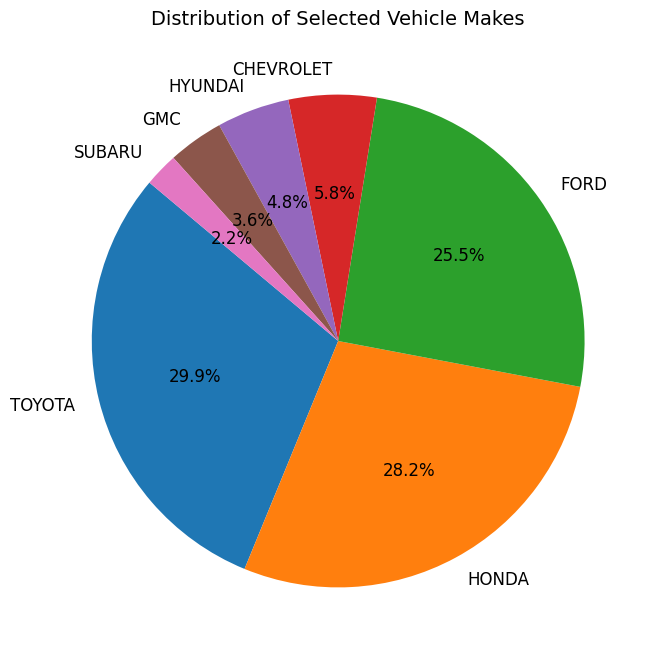

In [113]:
##Lets graph some stuff!
# List of makes you care about
selected_makes = ['TOYOTA', 'FORD', 'SUBARU', 'HYUNDAI', 'HONDA', 'GMC', 'CHEVROLET']

# Filter dataset to just those makes
make_counts = vehicle_df[vehicle_df['Make'].isin(selected_makes)]['Make'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    make_counts.values,
    labels=make_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 12}
)
plt.title('Distribution of Selected Vehicle Makes', fontsize=14)
plt.savefig("figures/make_distributions", dpi=300, bbox_inches='tight')
plt.show()

## That is a very unique graph.... and i cant seem to fix the year scaling. it is supposed to show the increase of data year over year

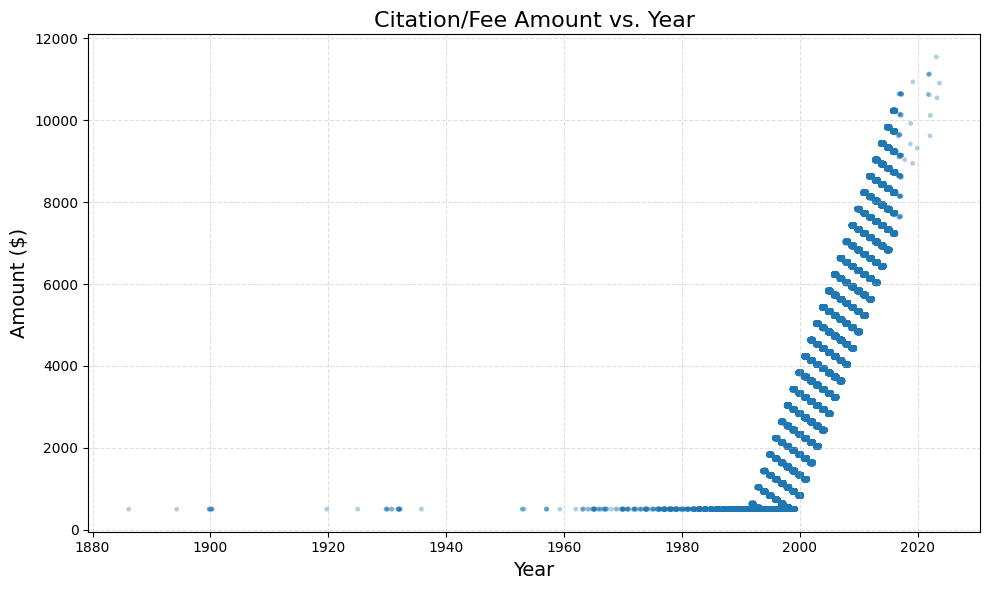

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = filtered_df.copy()   # or vehicle_df if you prefer

# --- Year: make it numeric and sane ---
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df[df['Year'].between(1885, 2025)]  # keep plausible vehicle years

# Bound to realistic amounts (adjust if your scale differs)
df = df[df['Price'].between(0, 20000)]

# Final rows to plot
plot_df = df.dropna(subset=['Year', 'Price']).copy()

# --- Scatter with light jitter on Year to reduce overplotting ---
jitter = (np.random.rand(len(plot_df)) - 0.5) * 0.6  # ~±0.3 year
plt.figure(figsize=(10, 6))
plt.scatter(plot_df['Year'] + jitter, plot_df['Price'], alpha=0.35, s=12, edgecolors='none')
plt.title('Citation/Fee Amount vs. Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount ($)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig("figures/citation_vs_year.png", dpi=300, bbox_inches='tight')
plt.show()


## Tracks the citation amount ves race as a quartile graph with outlies for each race plotted

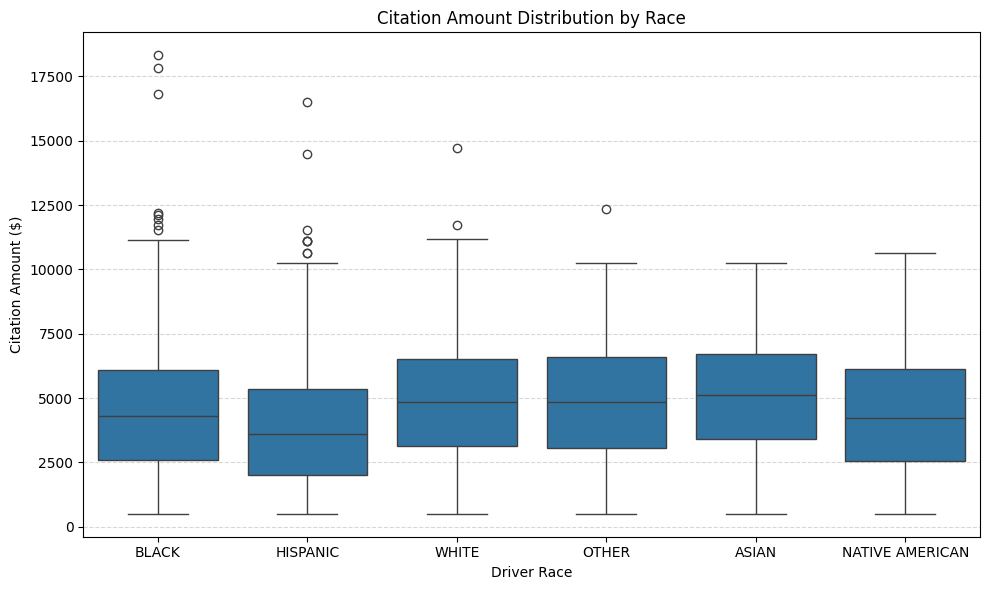

In [115]:
import seaborn as sns 
# Clean up price column
df = vehicle_df.copy()

# Keep only digits, commas, dots, minus
p = df['Price'].astype('string').str.replace(r'[^0-9,.\-]', '', regex=True)

# Remove thousand separators (commas or dots when followed by exactly 3 digits)
p = p.str.replace(r'(?<=\d)[,](?=\d{3}\b)', '', regex=True)   # remove thousand COMMAS
p = p.str.replace(r'(?<=\d)[.](?=\d{3}\b)', '', regex=True)   # remove thousand DOTS

# Use '.' as the decimal separator (turn any remaining ',' into '.')
p = p.str.replace(',', '.', regex=False)

# Convert to float
df['Price'] = pd.to_numeric(p, errors='coerce')

# Drop obviously bogus values (adjust the cap if your data says otherwise)
df.loc[(df['Price'] < 0) | (df['Price'] > 20000), 'Price'] = np.nan


plot_df = df.dropna(subset=['Race','Price'])

plt.figure(figsize=(10,6))
sns.boxplot(data=plot_df, x='Race', y='Price')
plt.title('Citation Amount Distribution by Race')
plt.xlabel('Driver Race'); plt.ylabel('Citation Amount ($)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout(); 
plt.savefig("figures/citation_vs_race.png", dpi=300, bbox_inches='tight')
plt.show()

## shows the average citation amound based on the time of stop using a scatter plot

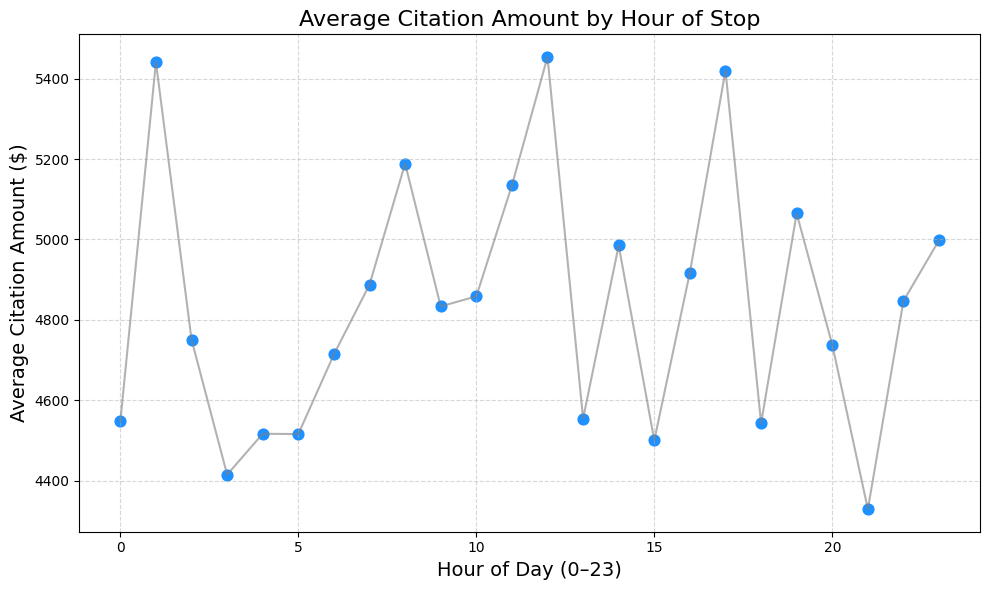

In [116]:
df = filtered_df.copy()

# Drop rows missing either field
df = df.dropna(subset=['Time Of Stop', 'Price'])

# Clean up the Time Of Stop values (remove spaces)
df['Time Of Stop'] = df['Time Of Stop'].astype(str).str.strip()

# Handle single-digit hours like "8:00:00" by zero-padding
df['Time Of Stop'] = df['Time Of Stop'].apply(
    lambda x: x if len(x.split(':')[0]) == 2 else '0' + x
)

# Extract hour safely
df['Hour'] = df['Time Of Stop'].str.extract(r'^(\d+):').astype(int)

# Group by hour
hourly = df.groupby('Hour')['Price'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(hourly['Hour'], hourly['Price'], s=60, color='dodgerblue')
plt.plot(hourly['Hour'], hourly['Price'], color='gray', alpha=0.6)
plt.title('Average Citation Amount by Hour of Stop', fontsize=16)
plt.xlabel('Hour of Day (0–23)', fontsize=14)
plt.ylabel('Average Citation Amount ($)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("figures/citation_vs_time.png", dpi=300, bbox_inches='tight')
plt.show()

# Shows the difference between genders and amount of citations recieved using a bar graph

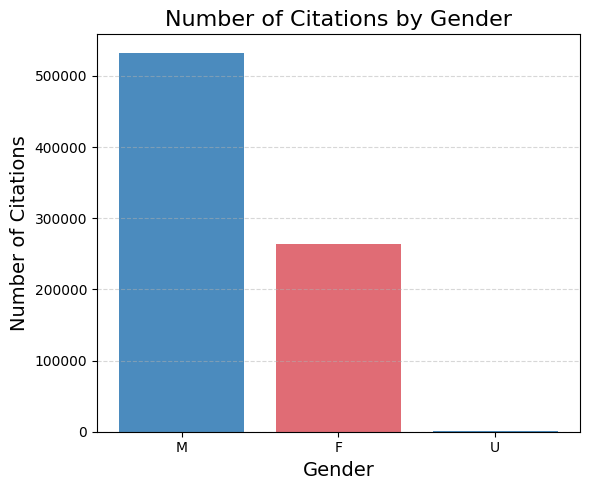

In [117]:
df = vehicle_df.copy()

# Drop missing genders
df = df.dropna(subset=['Gender'])

# Count how many citations per gender
gender_counts = df['Gender'].value_counts()

# Plot
plt.figure(figsize=(6, 5))
plt.bar(gender_counts.index, gender_counts.values, color=['#4B8BBE', '#E06C75'])
plt.title('Number of Citations by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Citations', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("figures/citation_vs_gender.png", dpi=300, bbox_inches='tight')
plt.show()